<a href="https://colab.research.google.com/github/hz3759-byte/Bootcamp-Project/blob/main/Copy_of_plotting_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### More plotting with `matplotlib` and `seaborn`

Today we continue to work with `matplotlib`, focusing on customization and using subplots.  Also, the `seaborn` library will be introduced as a second visualization library with additional functionality for plotting data.

In [ ]:
#!pip install -U seaborn

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Split-Apply-Combine

Inner group summaries where you define groups based on a categorical column or conditional statement.  A typical groupby statement looks like:

```python
df.groupby(column or condition)[optional column selection].aggregate_function()
```

*OR*

```python
df.groupby(column or condition)[optional column selection].plot_function()
```

In [ ]:
### load a sample dataset on tips
tips = sns.load_dataset('tips')
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

In [ ]:
#average tip by sex
tips.groupby("sex")["tip"].mean()

/tmp/ipython-input-2854646901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")["tip"].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [ ]:
#median tip by smoker
tips.groupby("smoker")["tip"].median()

/tmp/ipython-input-389482492.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip"].median()


smoker
Yes    3.00
No     2.74
Name: tip, dtype: float64

order determines which one gets grouped first

In [ ]:
#average tip by day and sex
tips.groupby(["day","sex"])["tip"].mean()

/tmp/ipython-input-1348464113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["day","sex"])["tip"].mean()


day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

/tmp/ipython-input-3001124446.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")["tip"].hist()


sex
Male      Axes(0.125,0.11;0.775x0.77)
Female    Axes(0.125,0.11;0.775x0.77)
Name: tip, dtype: object

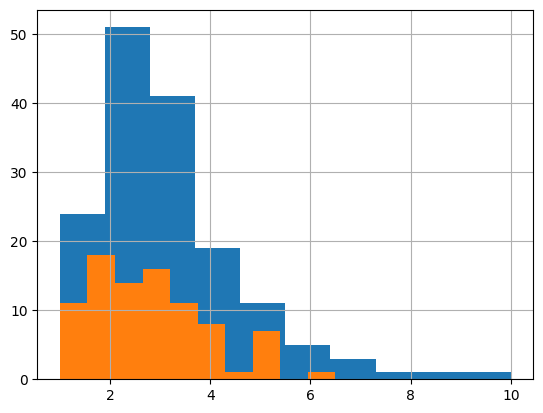

In [ ]:
#histogram of tips by sex
tips.groupby("sex")["tip"].hist()

In [ ]:
#Groups of more than three vs less than three
tips.groupby(tips["size"]<3)["tip"].mean()

size
False    3.845119
True     2.553687
Name: tip, dtype: float64

In [ ]:
#look at percentages instead
tips["conditional"]=tips["tip"]/tips["total_bill"]*100
tips.groupby("size")["conditional"].mean()

size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: conditional, dtype: float64

<Axes: xlabel='total_bill', ylabel='conditional'>

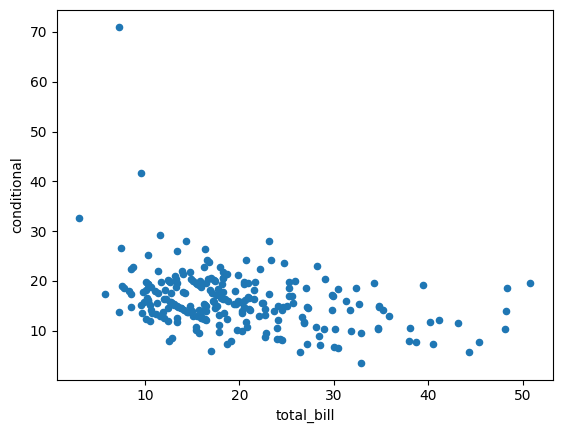

In [ ]:
tips.plot(kind= "scatter", x="total_bill", y="conditional")

**PROBLEM**

What are some questions you can answer using the `.groupby` method on the penguins dataset below?  Identify the questions and attempt to use `.groupby` to explore the answer.

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [ ]:
#the average boday mass of males and females
penguins.groupby("sex")["body_mass_g"].mean()

sex
Female    3862.272727
Male      4545.684524
Name: body_mass_g, dtype: float64

In [ ]:
#the average bill length of males whos mass is above average
penguins.groupby(penguins["sex"]=="Male", as_index=False)["bill_length_mm"].mean()

/tmp/ipython-input-4253123432.py:2: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  penguins.groupby(penguins["sex"]=="Male", as_index=False)["bill_length_mm"].mean()


bill_length_mm
0       42.055747
1       45.854762

#### Introduction to `seaborn`

The `seaborn` library is built on top of `matplotlib` and offers high level visualization tools for plotting data.  Typically a call to the `seaborn` library looks like:

```
sns.plottype(data = DataFrame, x = x, y = y, additional arguments...)
```

<Axes: xlabel='tip'>

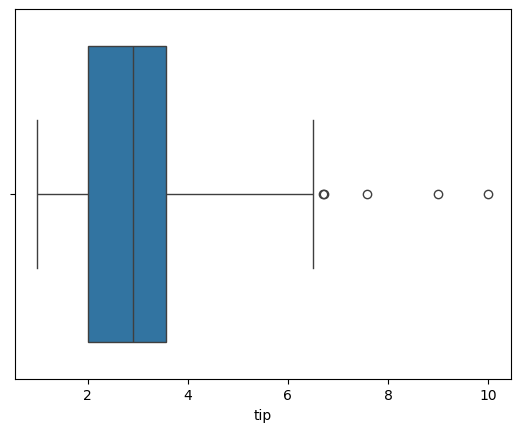

In [ ]:
### boxplot of tips
sns.boxplot(data=tips, x="tip",whis=2)

<Axes: xlabel='tip'>

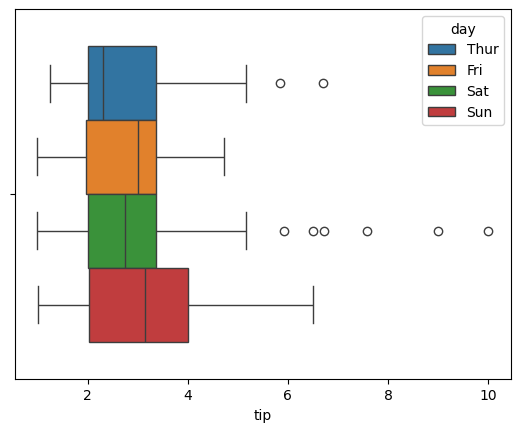

In [ ]:
### boxplot of tips by day
sns.boxplot(data=tips, x="tip",hue="day")

#### `hue`

The `hue` argument works like a grouping helper with `seaborn`.  Plots that have this argument will break the data into groups from the passed column and add an appropriate legend.

<Axes: xlabel='day', ylabel='tip'>

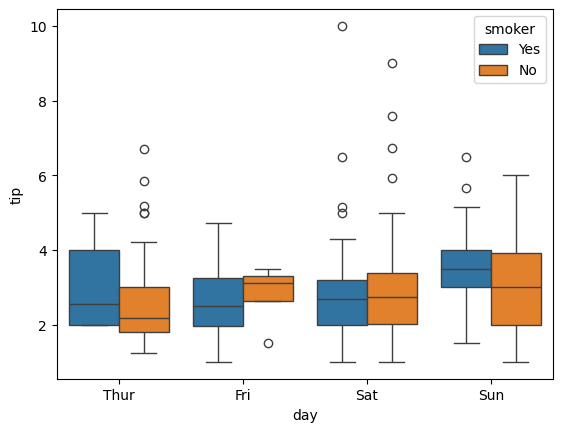

In [ ]:
### boxplot of tips by day by smoker
sns.boxplot(data=tips, x="day", y="tip",hue="smoker")

#### `displot`

For visualizing one dimensional distributions of data.

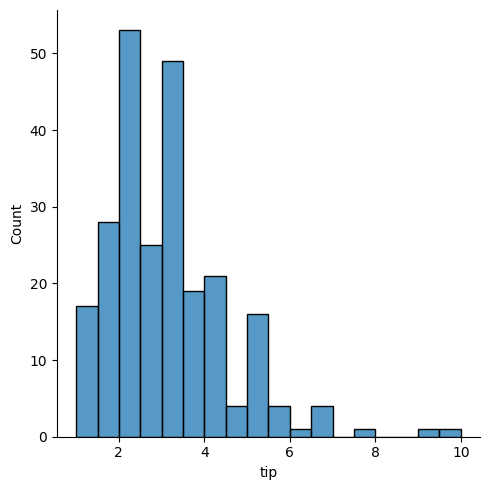

In [ ]:
### histogram of tips
sns.displot(data=tips, x="tip")

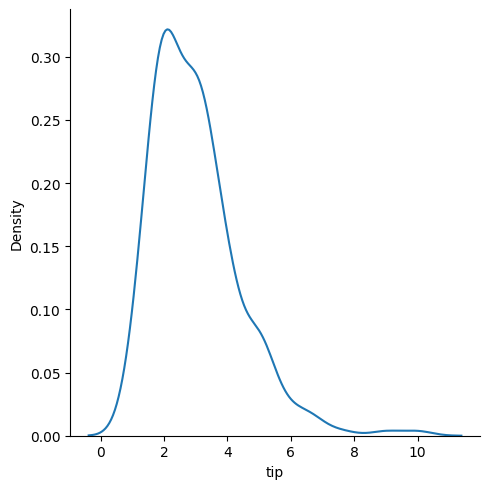

In [ ]:
### kde plot
sns.displot(data=tips, x="tip",kind="kde")

In [ ]:
### empirical cumulative distribution plot of tips by smoker


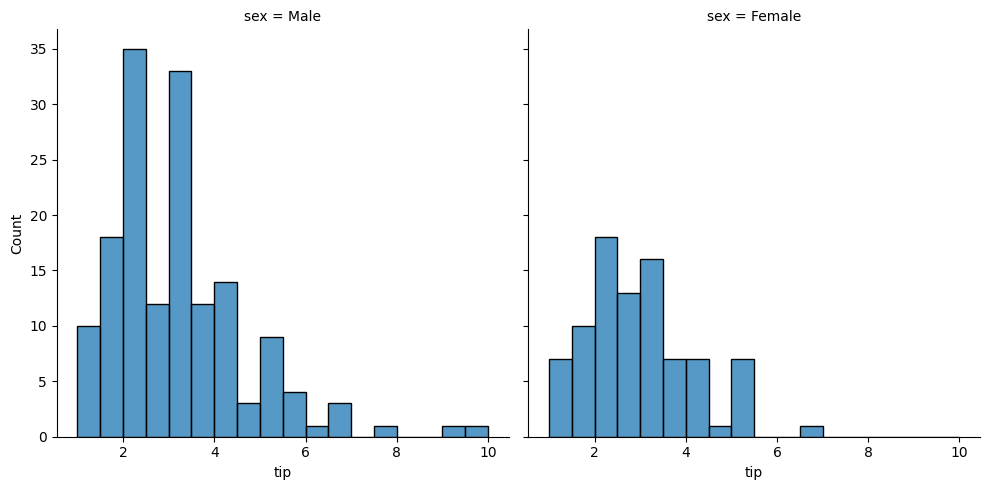

In [ ]:
### using the col argument
sns.displot(data=tips, x="tip",col="sex")

In [ ]:
#draw a histogram and a boxplot using seaborn on two axes
fig, ax = plt.subplots(1, 2, figsize = (15, 5))


NameError: name 'plt' is not defined

#### `relplot`

For visualizing relationships.

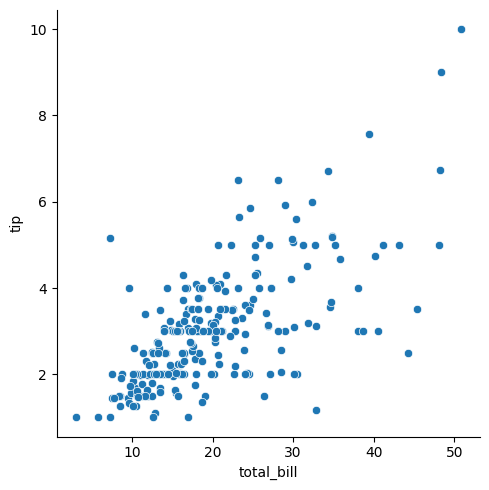

In [ ]:
### relplot of bill vs. tip
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

lowess=line of best fit

<Axes: xlabel='total_bill', ylabel='tip'>

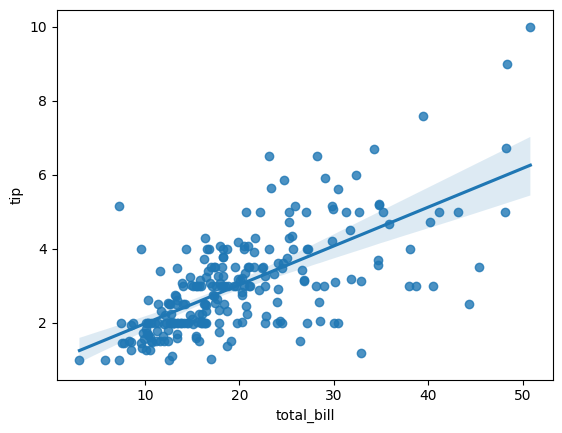

In [ ]:
### regression plot
sns.regplot(data = tips, x ='total_bill', y = 'tip', lowess = False )

<Axes: xlabel='smoker', ylabel='tip'>

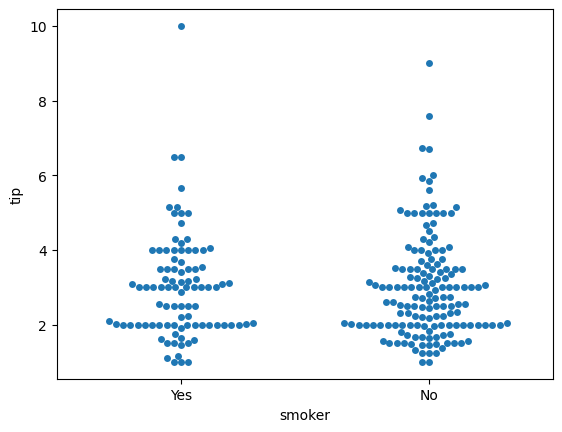

In [ ]:
### swarm
sns.swarmplot(data = tips, x = 'smoker', y = 'tip')

<Axes: xlabel='smoker', ylabel='tip'>

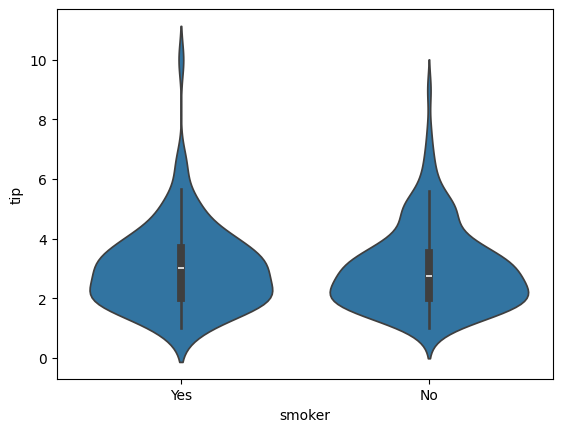

In [ ]:
### violin plot
sns.violinplot(data = tips, x = 'smoker', y = 'tip')

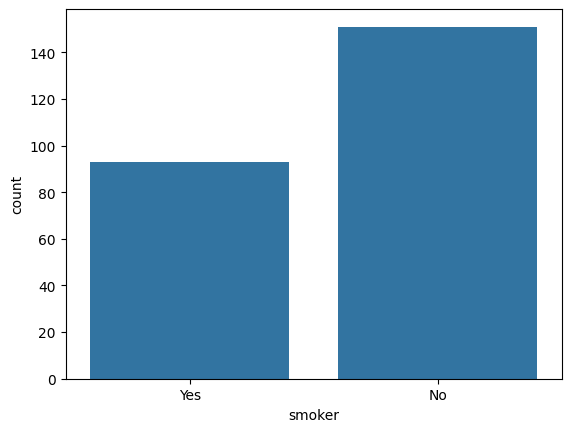

In [ ]:
### countplot
sns.countplot(data = tips, x = 'smoker');

1. Create a histogram of flipper length by species.  

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

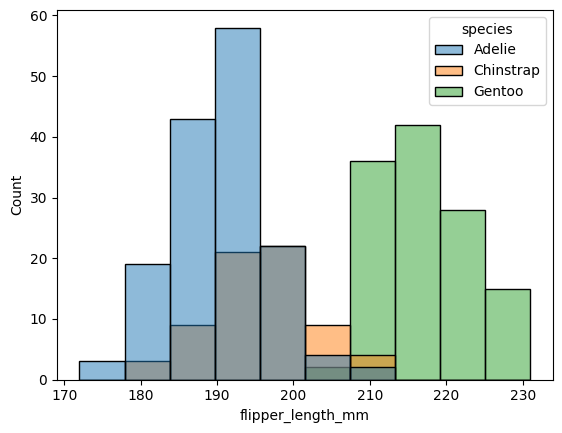

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

[]

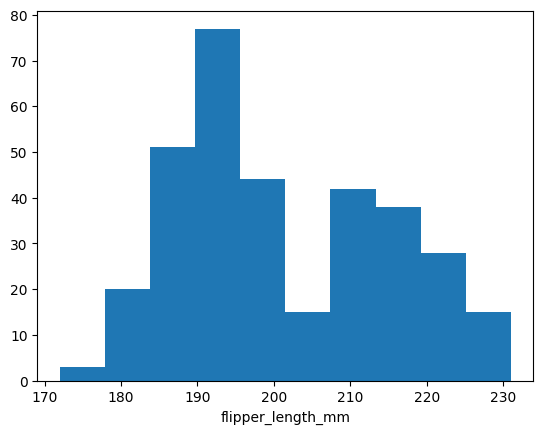

In [ ]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.hist(penguins["flipper_length_mm"])
ax.set_xlabel("flipper_length_mm")

plt.plot()

relplot-can change what kind of 2d plot is by changing arguments

2. Create a scatterplot of bill length vs. flipper length colored by species.

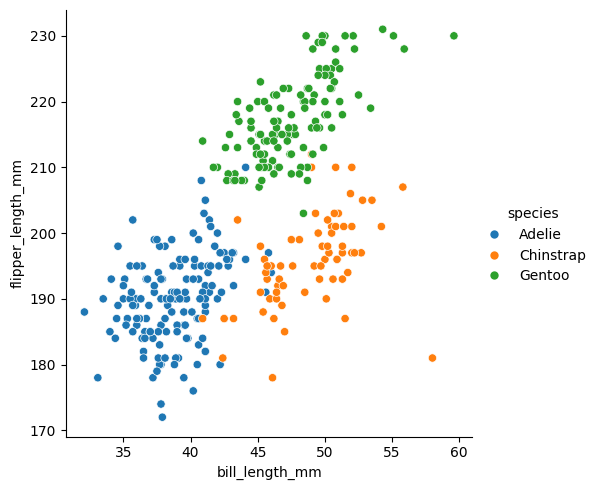

In [ ]:
sns.relplot(data=penguins,x="bill_length_mm", y="flipper_length_mm",hue="species" )

3. Create a violin plot of each species mass split by sex.

<Axes: xlabel='species', ylabel='body_mass_g'>

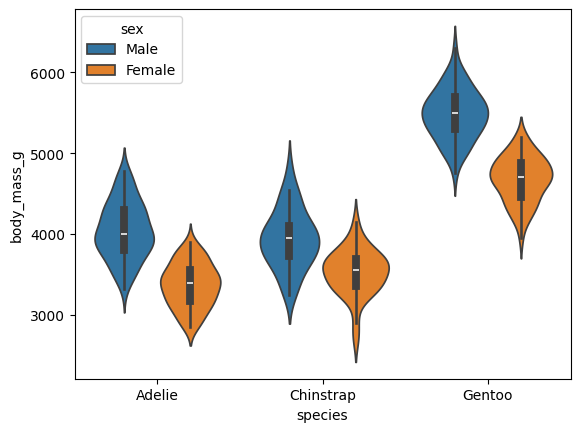

In [ ]:
sns.violinplot(data=penguins, x="species", y="body_mass_g", hue="sex")

#### Additional Plots

- `pairplot`
- `heatmap`

dropna drops na

In [ ]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

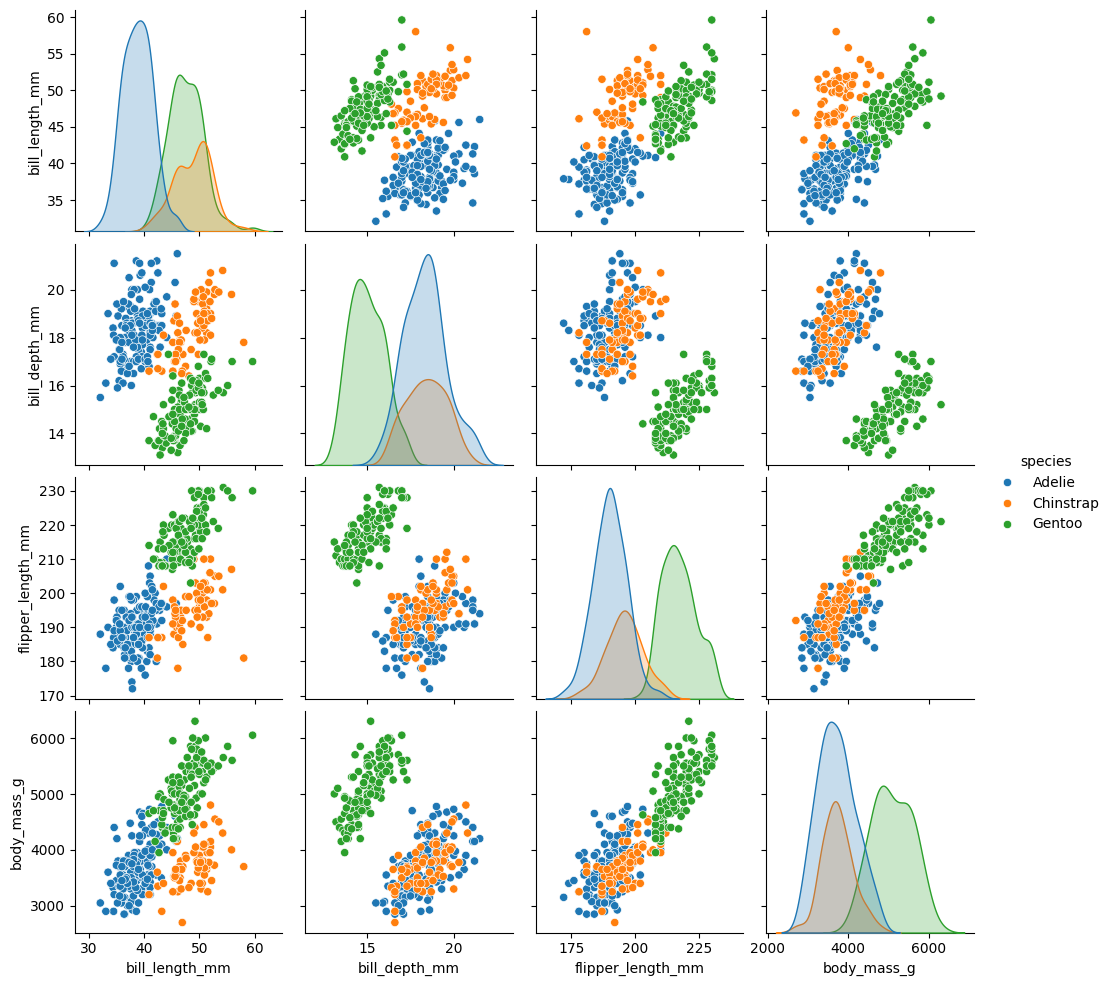

In [ ]:
### pairplot of penguins colored by species
sns.pairplot(data = penguins, hue = 'species')

In [ ]:
### housing data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame = True).frame
housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

#### Plotting Correlations

Correlation captures the strength of a linear relationship between features.  Often, this is easier to look at than a scatterplot of the data to establish relationships, however recall that this is only a detector for *linear* relationships!

In [ ]:
### correlation in data
housing.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

AttributeError: QuadMesh.set() got an unexpected keyword argument 'comp'

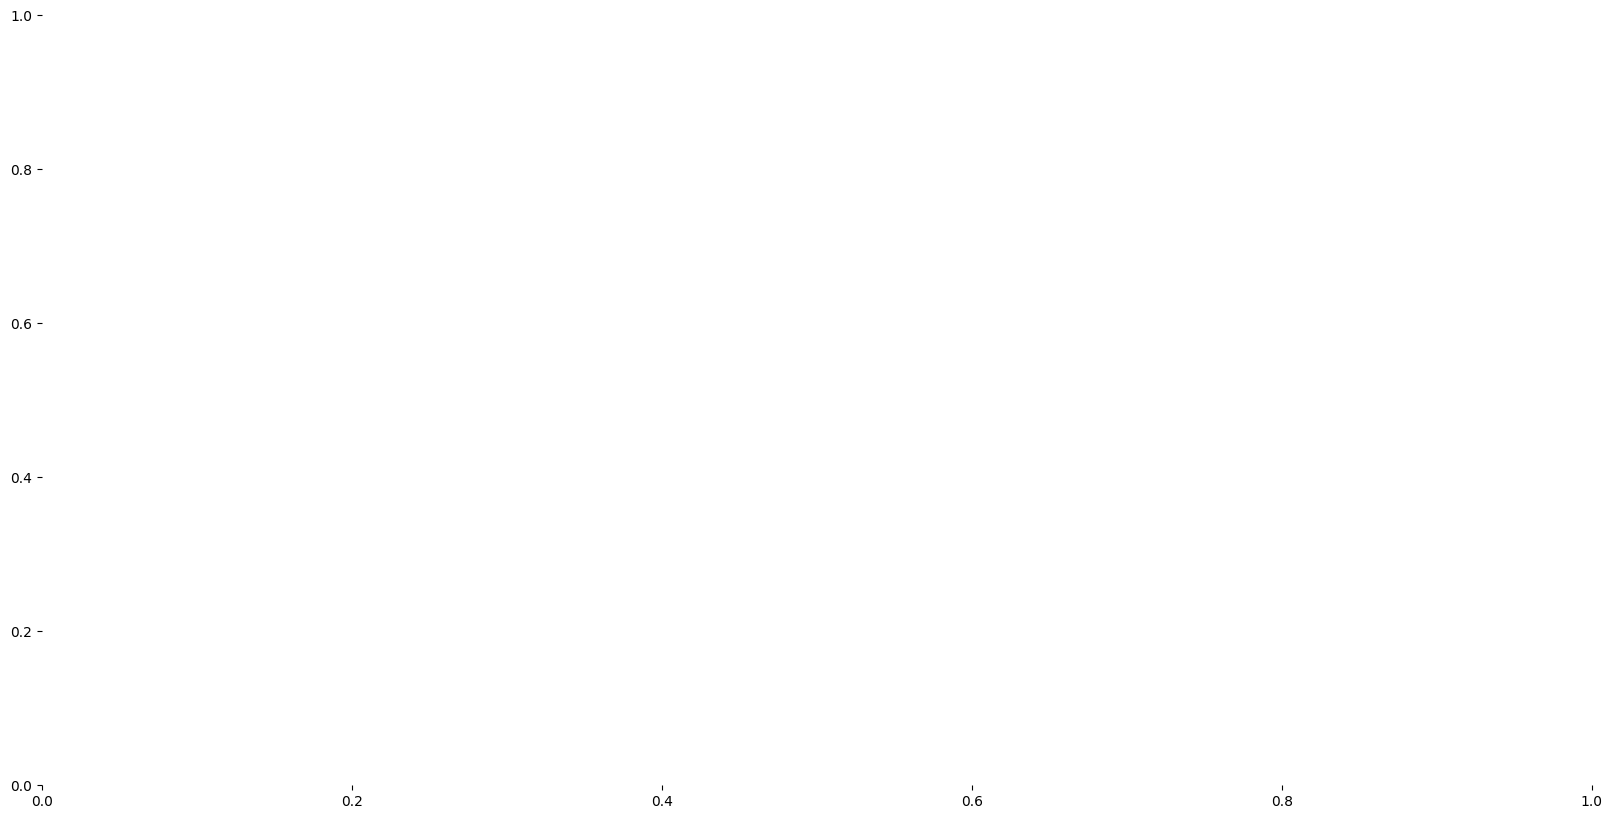

In [ ]:
### heatmap of correlations
plt.figure(figsize=(20,10))
sns.heatmap(housing.corr(),annot=True, comp="red")

#### Problems

Use the `diabetes` data below loaded from OpenML ([docs](https://www.openml.org/search?type=data&sort=runs&status=active&id=37)).  

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
diabetes = fetch_openml(data_id = 37).frame

In [ ]:
diabetes.head()

1. Distribution of ages separated by class.

2. Heatmap of features.  Any strong correlations?

In [ ]:
plt.figure(figsize = (20, 5))
sns.heatmap(diabetes.corr(), annot = True, cmap = 'BuPu')

###

#### EDA Case Study

**Introduction**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specializes in lending various types of loans to urban customers. We will have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

**Data Understanding**

This dataset has 3 files as explained below:

`application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

`columns_description.xlsx` is data dictionary which describes the meaning of the variables.


These files are located in the class repo in the `data` folder in a folder called `eda_case_data`.  I have also given a link to the data files in a drive folder [here](https://drive.google.com/drive/folders/1YpPjU4Y12MPrMdWaNDa6rS2MNirh2FG3?usp=sharing).

In [5]:
#import data
path="/application_data.csv"
app=pd.read_csv(path)
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
app["NAME_FAMILY_STATUS"]

0         Single / not married
1                      Married
2         Single / not married
3               Civil marriage
4         Single / not married
                  ...         
307506               Separated
307507                   Widow
307508               Separated
307509                 Married
307510                 Married
Name: NAME_FAMILY_STATUS, Length: 307511, dtype: object

In [7]:
#show columns
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

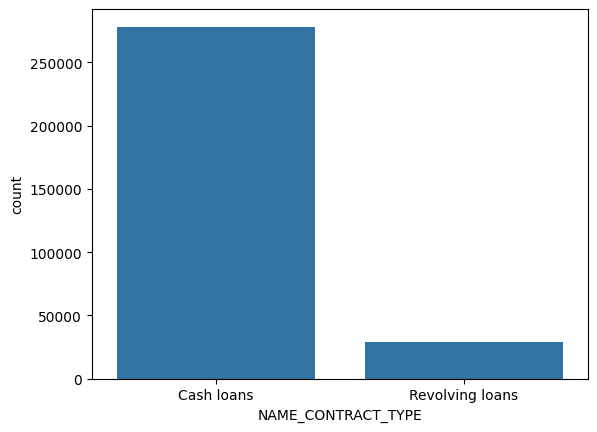

In [8]:
#counting loan types-marjority of loans are cash loans
sns.countplot(data=app, x="NAME_CONTRACT_TYPE")

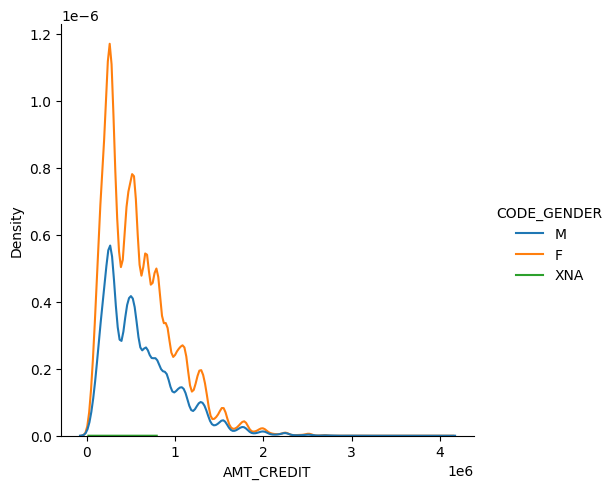

In [ ]:
sns.displot(data=app, x="AMT_CREDIT",kind="kde", hue="CODE_GENDER")

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

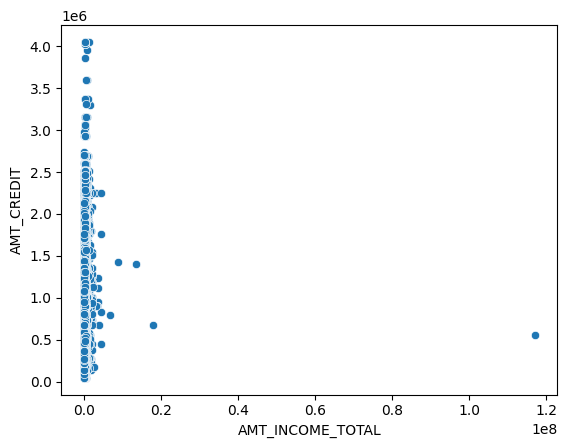

In [ ]:
sns.scatterplot(data=app, x="AMT_INCOME_TOTAL", y="AMT_CREDIT")

<Axes: xlabel='AMT_CREDIT'>

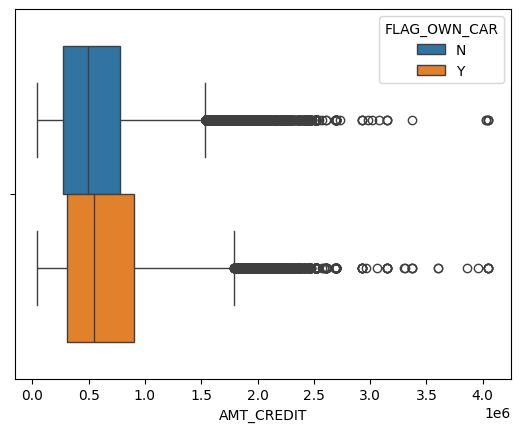

In [ ]:
sns.boxplot(data=app, x="AMT_CREDIT", hue="FLAG_OWN_CAR")

<Axes: xlabel='AMT_INCOME_TOTAL'>

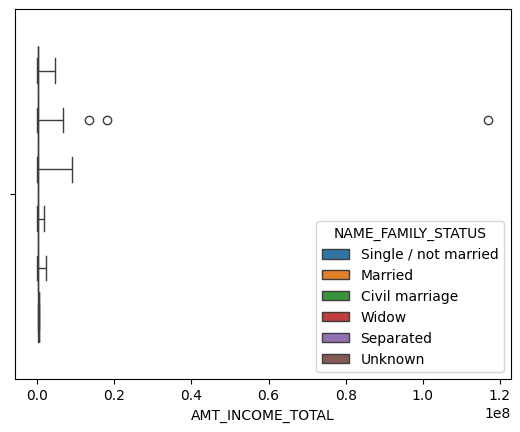

In [23]:
sns.boxplot(data=app, x="AMT_INCOME_TOTAL", hue="NAME_FAMILY_STATUS", whis=100)

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='AMT_ANNUITY'>

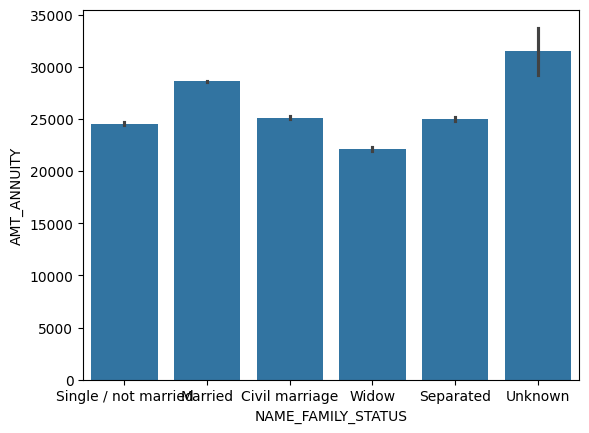

In [25]:
sns.barplot(data=app, x="NAME_FAMILY_STATUS", y="AMT_ANNUITY")

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='AMT_INCOME_TOTAL'>

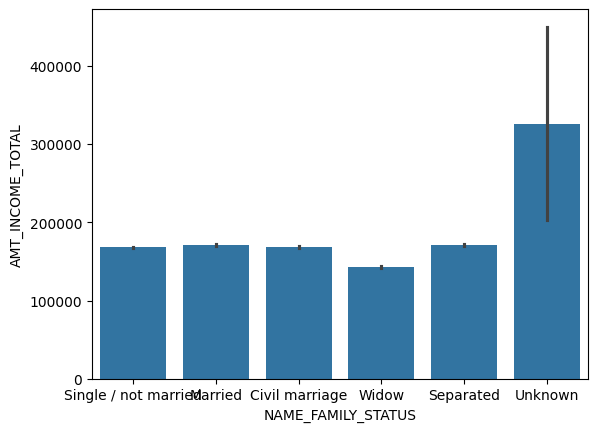

In [24]:
sns.barplot(data=app, x="NAME_FAMILY_STATUS", y="AMT_INCOME_TOTAL")

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

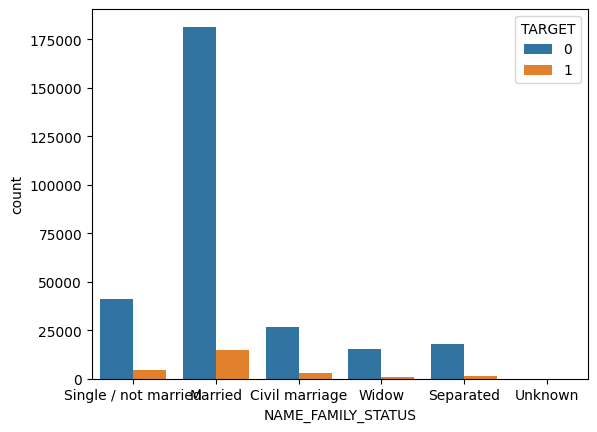

In [26]:
sns.countplot(data=app, x="NAME_FAMILY_STATUS", hue="TARGET")

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

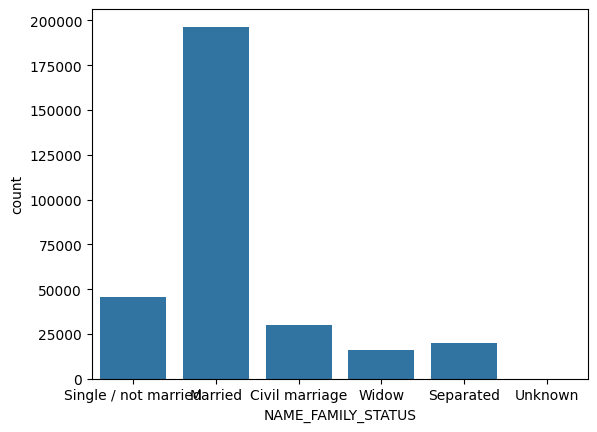

In [27]:
sns.countplot(data=app, x="NAME_FAMILY_STATUS")

In [ ]:
sns.pairplot(data=app, hue="CODE_GENDER")

KeyboardInterrupt: 

#### Deliverable

Your group should produce a brief presentation of your findings (5 - 10 slides).  In addition to your findings, your slides should include actionable insights as a result of your exploration connected to your visualizations.  You will submit this presentation prior to next class together with a notebook containing all your visualizations.